## Package requirements

In [2]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Solution of the exercise

In the following we implement flatten the image and perform PCA to map the data to a 2D space.

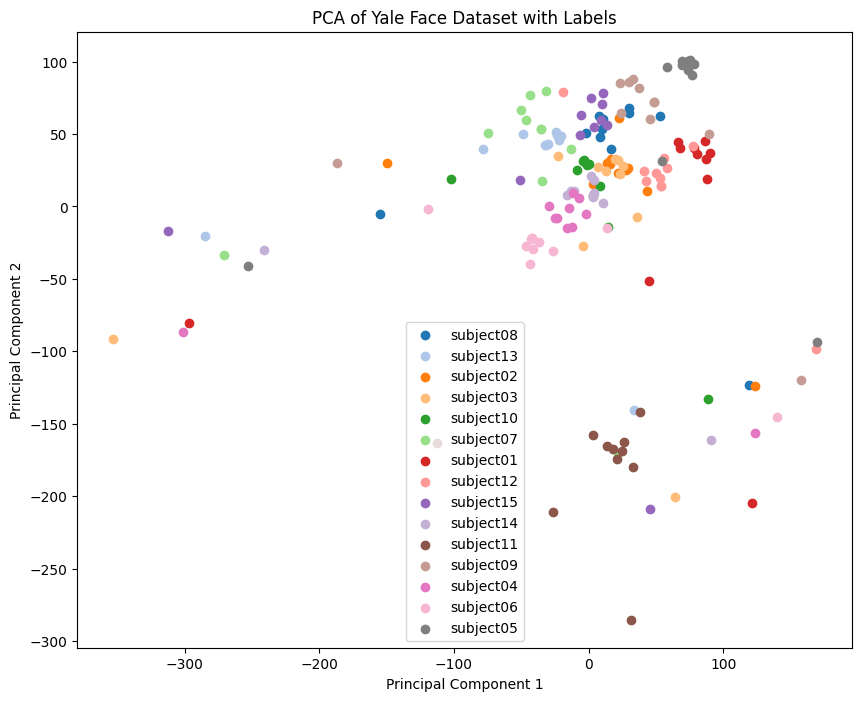

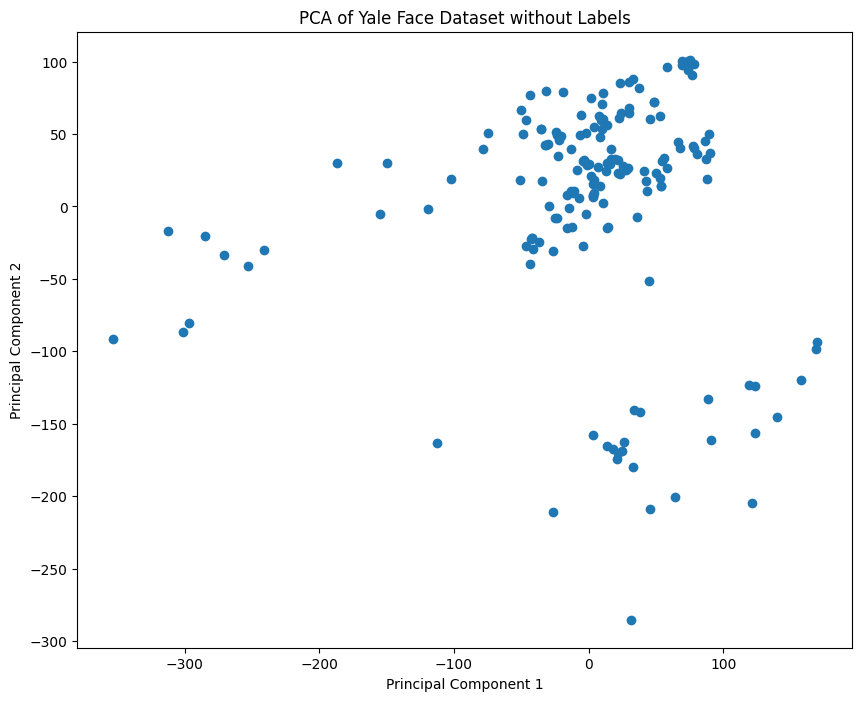

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the path to the Yale face dataset
dataset_path = 'YALE/centered'

# Function to load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.pgm'):
            img = imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
                # Assuming the label is the first part of the filename
                label = filename.split('.')[0]
                labels.append(label)
    return images, labels

# Load images and labels
images, labels = load_images_from_folder(dataset_path)

# Flatten images and create the data matrix
data = np.array([img.flatten() for img in images])

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Plot the first two principal components with colors representing the labels
plt.figure(figsize=(10, 8))
unique_labels = list(set(labels))
colors = plt.get_cmap('tab20')

for i, label in enumerate(unique_labels):
    indices = [index for index, l in enumerate(labels) if l == label]
    plt.scatter(principal_components[indices, 0], principal_components[indices, 1], label=label, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Yale Face Dataset with Labels')
plt.legend()
plt.show()

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Yale Face Dataset without Labels')
plt.show()

As we can see by the first plot, cluster are visible in the map space for about the half of the subject. For example its clear for subject 05 and subject 06, while its less clear teh distinction between subjects 07, 08, 13 and 15.
It could be interesting to compare this method with other ones, such as tSNE, that use a different paradigm (and in this case perform better).
In fact in the second plot, where we didn't colors diffeent labels, the clusters of pictures of same subject are much more difficult to individuate.